In [1]:
import numpy as np
import matplotlib.pyplot as plt

### scikit-learn's SVM implementation: SVC ###
from sklearn.svm import SVC 

## Create classes of clustered points
Data needs to be of form: \
`X`: a variable containing the measurable parameters for each point; has shape (n_points, n_classes) \
`y`: a variable containing the class for each data point (think: the auxillary axis of a scatter plot);
    has shape (n_points)

X shape: (20, 2)
y shape: (20,)


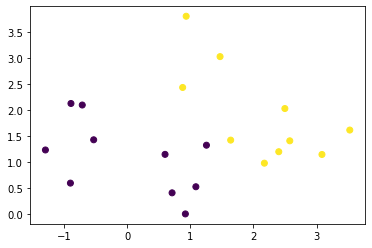

In [28]:
### Generate example dataset###
np.random.seed(1)
N1 = 10
N2 = 10

mu1 = np.array([1.0, 1.0])
mu2 = np.array([2.0, 2.0])

cov1 = np.array([[1, -0.5], 
                 [-0.5, 1]])
cov2 = cov1

X = np.vstack([np.random.multivariate_normal(mu1, cov1, N1),
             np.random.multivariate_normal(mu2, cov2, N2)])
y = np.hstack([np.zeros(N1), np.ones(N2)])

print('X shape:', X.shape)
print('y shape:', y.shape)

plt.scatter(X[:,0], X[:,1], c = y) # plots X as axes, with y as color 
plt.show()

## Fit SVM:
We'll teach `sklearn.svm`'s SVC (C-Support Vector Classification) to classify our data. 

The `SVC` class can be initialized by name, and then fit to the data using its built-in `fit()` function.

In [27]:
svm = SVC(kernel = 'linear') # creates a new SVC model 
svm.fit(X, y) # fit to generated data

SVC(kernel='linear')

Once fit, we can access the model parameters
+ `svm.support_vectors_`: gives the 'support vectors, the nearest data points to the hyperplane
+ `svm.support_`: gives indices of the suppport vectors
+ `svm.coef_`
+ `svm.intercept_`

In [10]:
xx = np.linspace(-5, 5)
w = svm.coef_[0]
m = - w[0] / w[1]
b = - svm.intercept_[0] / w[1]
yy = m * xx + b

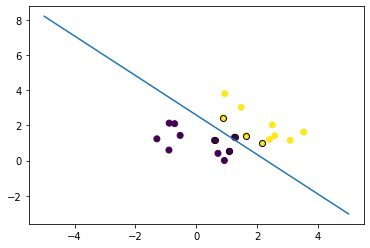

In [26]:
plt.scatter(X[:,0], X[:,1], c = y)
plt.plot(X[:,0][svm.support_], X[:,1][svm.support_], lw = 0,marker = 'o', fillstyle = 'none', c = 'k')
plt.plot(xx, yy)
plt.show()